In [1]:
# Si python3.13
# pip install psycopg2-binary
# Si python3.11
# pip install psycopg2-binary==2.9.9

In [2]:
import psycopg2
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

user = "admin"
password = "password"
host = "localhost"
port = "5432"
dbname = "crypto_db"

conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)

############### BTC #######################
query = "SELECT * FROM btc_usd;" #LIMIT 5
df_btc_usd = pd.read_sql(query, conn)
df_btc_usd = df_btc_usd[["price", "datetime_utc"]]
# display(df_btc_usd)

query = "SELECT * FROM btc_usd_avg_indicator;" 
df_btc_usd_avg_indicator = pd.read_sql(query, conn)
df_btc_usd_avg_indicator = df_btc_usd_avg_indicator[["price_avg_3m", "price_avg_5m", "datetime_utc"]]
# display(df_btc_usd_avg_indicator)

df_btc_usd_merged = pd.merge(
    df_btc_usd,
    df_btc_usd_avg_indicator,
    on="datetime_utc",
    how="left"
)
display(df_btc_usd_merged)

############### ETH #######################
query = "SELECT * FROM eth_usd;"
df_eth_usd = pd.read_sql(query, conn)
df_eth_usd = df_eth_usd[["price", "datetime_utc"]]
# display(df_eth_usd)

query = "SELECT * FROM eth_usd_avg_indicator;" 
df_eth_usd_avg_indicator = pd.read_sql(query, conn)
df_eth_usd_avg_indicator = df_eth_usd_avg_indicator[["price_avg_3m", "price_avg_5m", "datetime_utc"]]
# display(df_eth_usd_avg_indicator)

df_eth_usd_merged = pd.merge(
    df_eth_usd,
    df_eth_usd_avg_indicator,
    on="datetime_utc",
    how="left"
)


display(df_eth_usd_merged)


############### AVG 5min of GAP BETWEEN BTC AND ETH #######################
query = "SELECT * FROM btc_eth_gap_avg_5m_indicator;"
df_btc_eth_gap_avg_5min = pd.read_sql(query, conn)
df_btc_eth_gap_avg_5min = df_btc_eth_gap_avg_5min[["btc_eth_gap_avg_5m", "datetime_utc"]]
# display(df_btc_eth_gap_avg_5min)

df_btc_df_eth = pd.merge(
    df_btc_usd,
    df_eth_usd,
    on="datetime_utc",
    how="left"
)
df_btc_df_eth = df_btc_df_eth.rename(columns={"price_x": "btc_price", "price_y": "eth_price"})

df_btc_df_eth_df_gap_avg_5min = pd.merge(
    df_btc_df_eth,
    df_btc_eth_gap_avg_5min,
    on="datetime_utc",
    how="left"
)
display(df_btc_df_eth_df_gap_avg_5min)

conn.close()

,price,datetime_utc,price_avg_3m,price_avg_5m
0,117301.680,2025-09-18 09:32:00+00:00,NaN,NaN
1,117284.805,2025-09-18 09:33:00+00:00,NaN,NaN
2,117274.080,2025-09-18 09:34:00+00:00,117286.8550,NaN
3,117271.080,2025-09-18 09:35:00+00:00,117276.6550,NaN
4,117249.500,2025-09-18 09:36:00+00:00,117264.8867,117276.229
5,117255.430,2025-09-18 09:37:00+00:00,117258.6700,117266.979
6,117255.430,2025-09-18 09:38:00+00:00,117253.4533,117261.104
7,117251.770,2025-09-18 09:39:00+00:00,117254.2100,117256.642
8,117256.780,2025-09-18 09:40:00+00:00,117254.6600,117253.782
9,117205.100,2025-09-18 09:41:00+00:00,NaN,NaN


,price,datetime_utc,price_avg_3m,price_avg_5m
0,4603.3335,2025-09-18 09:32:00+00:00,NaN,NaN
1,4602.3022,2025-09-18 09:33:00+00:00,NaN,NaN
2,4599.7856,2025-09-18 09:34:00+00:00,4601.8071,NaN
3,4598.4507,2025-09-18 09:35:00+00:00,4600.1795,NaN
4,4594.1620,2025-09-18 09:36:00+00:00,4597.4661,4599.6068
5,4595.8340,2025-09-18 09:37:00+00:00,4596.1489,4598.1069
6,4594.5605,2025-09-18 09:38:00+00:00,4594.8522,4596.5586
7,4593.9033,2025-09-18 09:39:00+00:00,4594.7659,4595.3821
8,4592.4110,2025-09-18 09:40:00+00:00,4593.6249,4594.1742
9,4592.4110,2025-09-18 09:41:00+00:00,NaN,NaN


,btc_price,datetime_utc,eth_price,btc_eth_gap_avg_5m
0,117301.680,2025-09-18 09:32:00+00:00,4603.3335,112698.3465
1,117284.805,2025-09-18 09:33:00+00:00,4602.3022,112690.4247
2,117274.080,2025-09-18 09:34:00+00:00,4599.7856,112685.0479
3,117271.080,2025-09-18 09:35:00+00:00,4598.4507,112681.9432
4,117249.500,2025-09-18 09:36:00+00:00,4594.1620,112676.6222
5,117255.430,2025-09-18 09:37:00+00:00,4595.8340,112668.8721
6,117255.430,2025-09-18 09:38:00+00:00,4594.5605,112664.5454
7,117251.770,2025-09-18 09:39:00+00:00,4593.9033,112661.2599
8,117256.780,2025-09-18 09:40:00+00:00,4592.4110,112659.6078
9,117205.100,2025-09-18 09:41:00+00:00,4592.4110,NaN


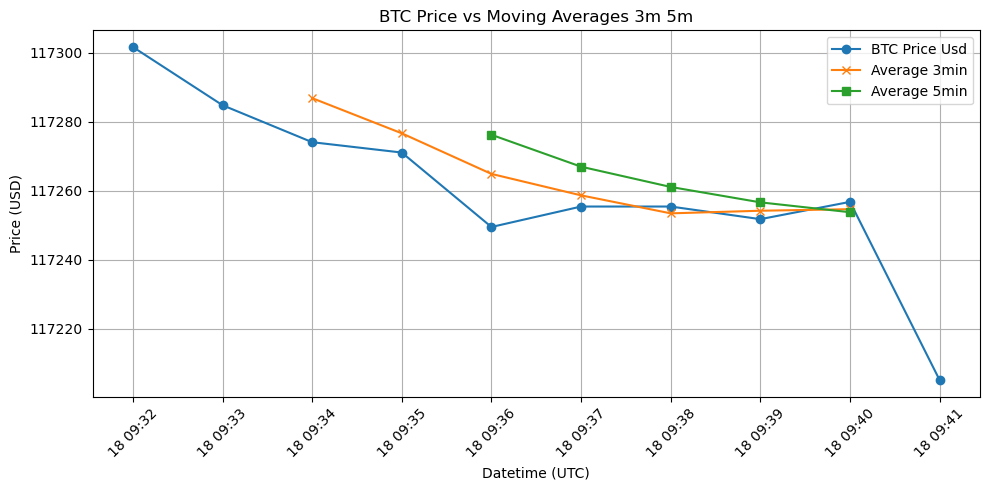

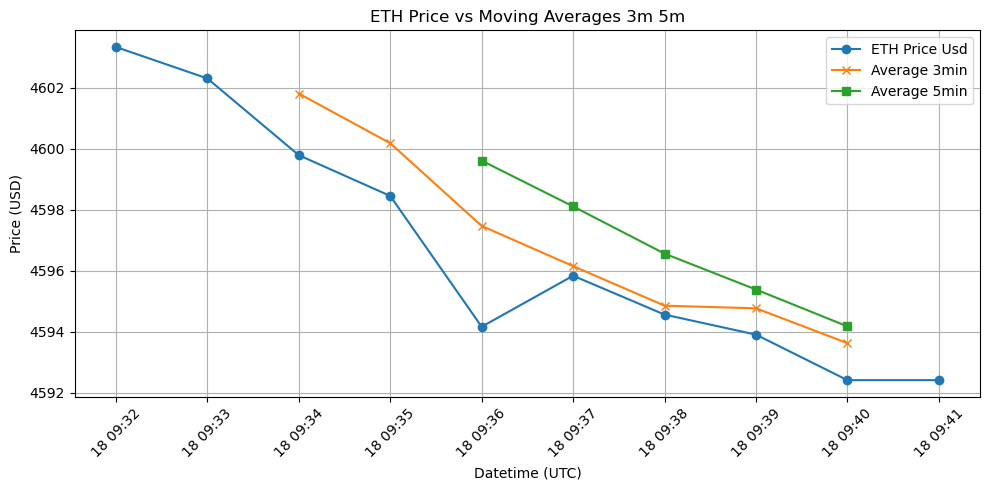

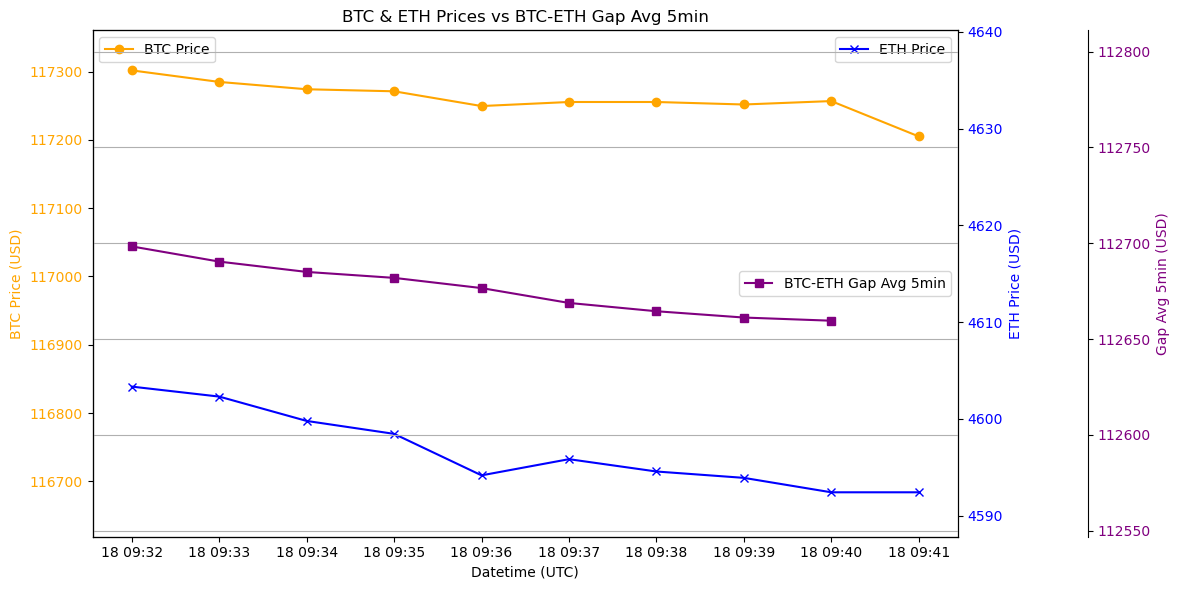

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

####################### BTC #############################

df_btc_usd_merged['datetime_utc'] = pd.to_datetime(df_btc_usd_merged['datetime_utc'])

plt.figure(figsize=(10, 5))

# Courbe du prix BTC
plt.plot(
    df_btc_usd_merged['datetime_utc'], 
    df_btc_usd_merged['price'], 
    marker='o', 
    label='BTC Price Usd'
)

# Courbe des moyennes
plt.plot(
    df_btc_usd_merged['datetime_utc'], 
    df_btc_usd_merged['price_avg_3m'], 
    marker='x', 
    label='Average 3min'
)

plt.plot(
    df_btc_usd_merged['datetime_utc'], 
    df_btc_usd_merged['price_avg_5m'], 
    marker='s', 
    label='Average 5min'
)

plt.xlabel('Datetime (UTC)')
plt.ylabel('Price (USD)')
plt.title('BTC Price vs Moving Averages 3m 5m')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####################### ETH #############################
df_eth_usd_merged['datetime_utc'] = pd.to_datetime(df_eth_usd_merged['datetime_utc'])

plt.figure(figsize=(10, 5))

# Courbe du prix ETH
plt.plot(
    df_eth_usd_merged['datetime_utc'], 
    df_eth_usd_merged['price'], 
    marker='o', 
    label='ETH Price Usd'
)

# Courbe des moyennes
plt.plot(
    df_eth_usd_merged['datetime_utc'], 
    df_eth_usd_merged['price_avg_3m'], 
    marker='x', 
    label='Average 3min'
)

plt.plot(
    df_eth_usd_merged['datetime_utc'], 
    df_eth_usd_merged['price_avg_5m'], 
    marker='s', 
    label='Average 5min'
)

plt.xlabel('Datetime (UTC)')
plt.ylabel('Price (USD)')
plt.title('ETH Price vs Moving Averages 3m 5m')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####################### BTC ETH AND AVG GAP 5min #############################
df_btc_df_eth_df_gap_avg_5min['datetime_utc'] = pd.to_datetime(df_btc_df_eth_df_gap_avg_5min['datetime_utc'])

fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe principal : BTC Price
ax1.plot(
    df_btc_df_eth_df_gap_avg_5min['datetime_utc'], 
    df_btc_df_eth_df_gap_avg_5min['btc_price'], 
    marker='o', color='orange', label='BTC Price'
)
ax1.set_xlabel('Datetime (UTC)')
ax1.set_ylabel('BTC Price (USD)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.legend(loc='upper left')

# Deuxième axe : ETH Price
ax2 = ax1.twinx()
ax2.plot(
    df_btc_df_eth_df_gap_avg_5min['datetime_utc'], 
    df_btc_df_eth_df_gap_avg_5min['eth_price'], 
    marker='x', color='blue', label='ETH Price'
)
ax2.set_ylabel('ETH Price (USD)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='upper right')

# Troisième axe : BTC-ETH Gap Avg 5min
ax3 = ax1.twinx()
ax3.plot(
    df_btc_df_eth_df_gap_avg_5min['datetime_utc'], 
    df_btc_df_eth_df_gap_avg_5min['btc_eth_gap_avg_5m'], 
    marker='s', color='purple', label='BTC-ETH Gap Avg 5min'
)
ax3.set_ylabel('Gap Avg 5min (USD)', color='purple')
ax3.tick_params(axis='y', labelcolor='purple')
ax3.spines['right'].set_position(('axes', 1.15))
ax3.legend(loc='center right')

# Axe principal : BTC Price
ax1.set_ylim(df_btc_df_eth_df_gap_avg_5min['btc_price'].min() * 0.995, 
             df_btc_df_eth_df_gap_avg_5min['btc_price'].max() * 1.0005)

# Deuxième axe : ETH Price
ax2.set_ylim(df_btc_df_eth_df_gap_avg_5min['eth_price'].min() * 0.999, 
             df_btc_df_eth_df_gap_avg_5min['eth_price'].max() * 1.008)



# Troisième axe : BTC-ETH Gap Avg 5min
ax3.set_ylim(df_btc_df_eth_df_gap_avg_5min['btc_eth_gap_avg_5m'].min() * 0.999, 
             df_btc_df_eth_df_gap_avg_5min['btc_eth_gap_avg_5m'].max() * 1.001)

plt.title('BTC & ETH Prices vs BTC-ETH Gap Avg 5min')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()